In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Furniture Sales Forecast
Every business owner’s objective is to estimate the future trends – in terms of sales, profits, gains etc. To do this analysis, the owner first has to segregate the data by category and analyze each entity separately. For each entity, a forecast can be estimated based on the past sales of that entity. The idea behind this is to find out the popularity of a certain product and how its sales can impact the business.

Every product category is unique and cater to different customer base. So the analysis cannot be generalized that one trend is applicable to all products. A thorough insight into the past performance will reveal a lot of components that will enable the business to identify the trends

#### Business Objective
Build a forecast model to predict the furniture sales of a certain store


### Data Description
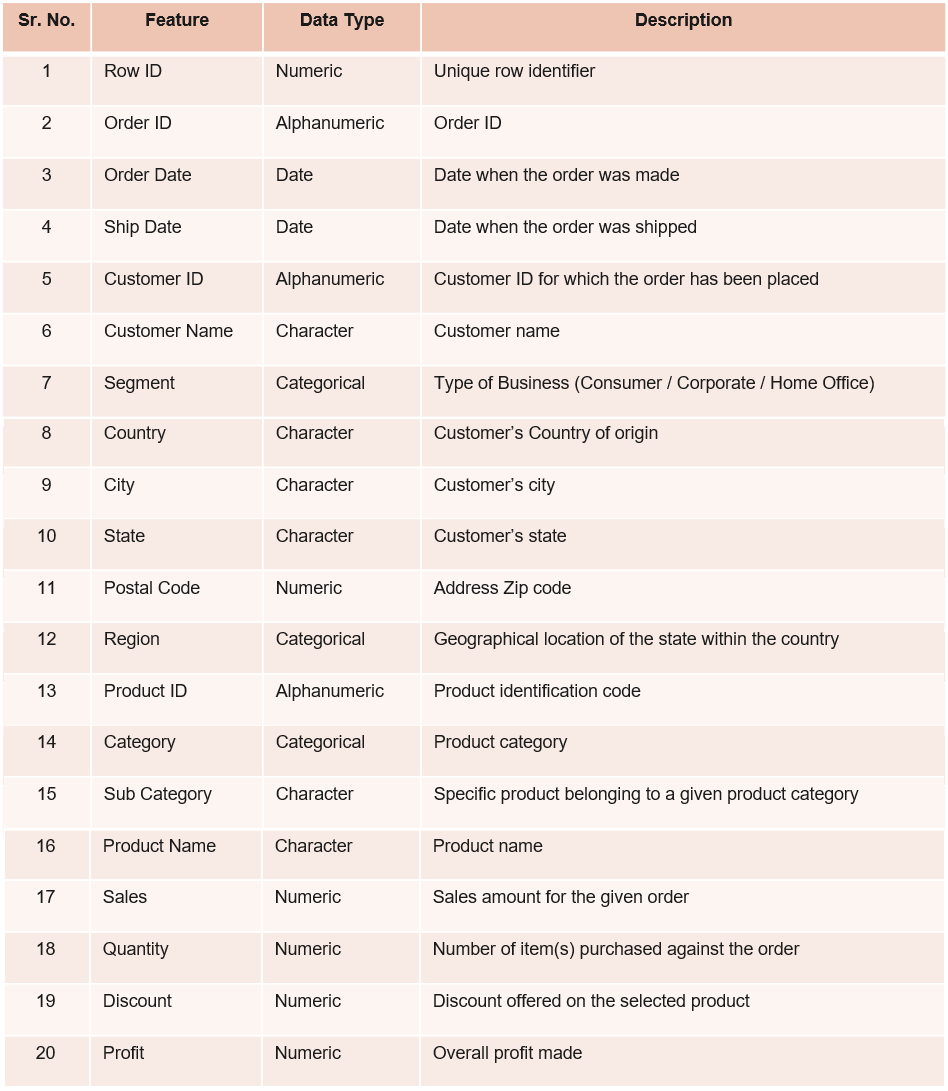

In [2]:
 #Importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, pacf, acf
import statsmodels.api as sm

#ARIMA model
from statsmodels.tsa.arima_model import ARIMA

#SARIMA MODEL
from statsmodels.tsa.statespace.sarimax import SARIMAX

#plotting acf and pacf 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

#library for visualization the graphs
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
!pip install xlrd==1.2.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Load the dataset into a Pandas data frame.

In [4]:
#read the data 
store_df=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/ML/DATA/DS3_C6_S4_TimeSeries_Sales_Data_Project.xls")
store_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


### DATA PRE-PROCESSING

In [5]:
#CHECKING FOR THE NULL VALUES IN DATASET
store_df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [6]:
#CHECK SPECIAL CHARACTER IN DATASET 
store_df = store_df.replace(to_replace = "@_!#$%^&*()<>?/\|}{~:?", value = np.nan)  
store_df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

###EXPLORATORY DATA ANALYSIS

VISUALIZATION FOR CATEGORICAL DATA

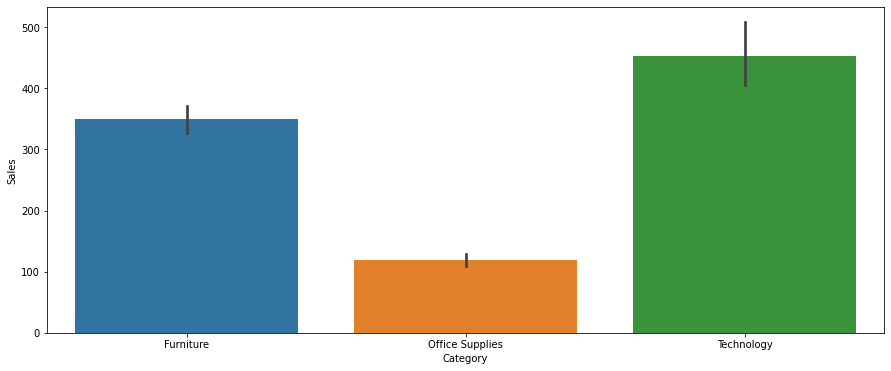

In [7]:
plt.figure(figsize=(15,6))
sns.barplot(x='Category', y='Sales', data=store_df)

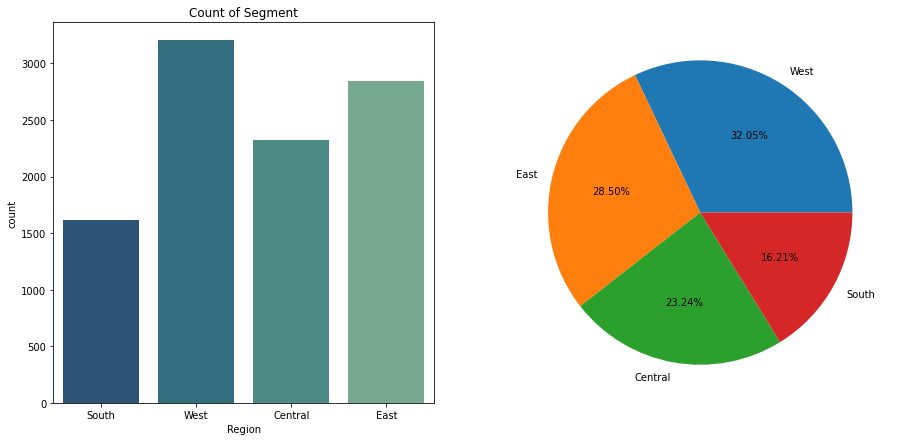

In [8]:
fig,ax = plt.subplots(1,2,figsize=(15,7))
ax[0].set_title("Count of Segment") 
percentage = store_df["Region"].value_counts()
labels = list(store_df["Region"].value_counts().index)

sns.countplot(x=store_df["Region"],ax=ax[0],palette = 'crest_r')
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")
plt.show()

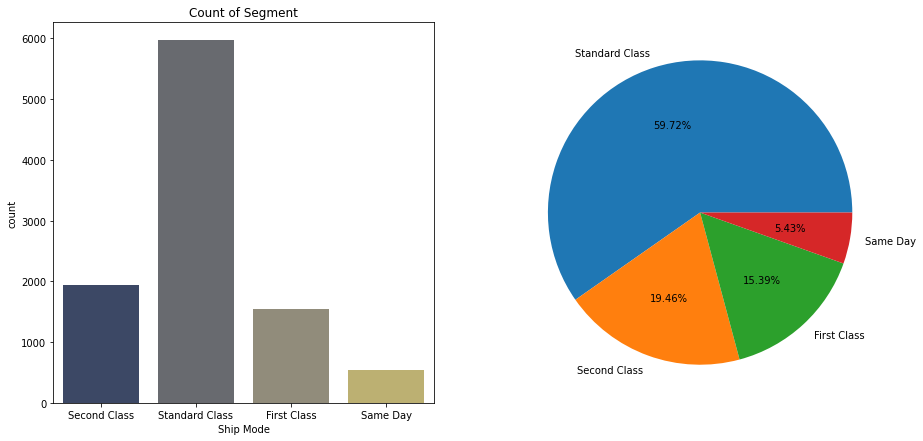

In [9]:
fig,ax = plt.subplots(1,2,figsize=(15,7))
ax[0].set_title("Count of Segment") 
percentage = store_df["Ship Mode"].value_counts()
labels = list(store_df["Ship Mode"].value_counts().index)

sns.countplot(x=store_df["Ship Mode"],ax=ax[0],palette = 'cividis')
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")
plt.show()

In [10]:
#PLOTTING HISTOGRAM WIHT THE BOX PLOT USING PLOTLY
fig = px.histogram(store_df, x="Ship Mode", marginal = 'box')
fig.show()


In [11]:

#PLOTTING HISTOGRAM WIHT THE BOX PLOT USING PLOTLY
fig = px.histogram(store_df, x="Quantity", marginal = 'box')
fig.show()

##MODEL BUILDING

AS WE'VE TO CHECT THE PREDICTION FOR THE FURNITURE TYPE PRODUCT CATERGORY, SO EXTACTING ALL DATA OF FURNITURE CATEGORY TO NEW DATAFRAME.

In [12]:
#read the data 
store_df2=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/ML/DATA/DS3_C6_S4_TimeSeries_Sales_Data_Project.xls",parse_dates=['Order Date'])
store_df2

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [13]:
store_df_new=store_df2[store_df2["Category"]== 'Furniture']
store_df_new

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,9963,CA-2015-168088,2015-03-19,2015-03-22,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
9964,9965,CA-2016-146374,2016-12-05,2016-12-10,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
9980,9981,US-2015-151435,2015-09-06,2015-09-09,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028


In [14]:
store_df_new2=store_df_new.copy()

In [15]:
store_df_new = store_df_new.sort_values(by=['Order Date'])

In [16]:
store_df_new = store_df_new.groupby('Order Date')['Sales'].sum().reset_index()
store_df_new

,Order Date,Sales
0,2014-01-06,2573.8200
1,2014-01-07,76.7280
2,2014-01-10,51.9400
3,2014-01-11,9.9400
4,2014-01-13,879.9390
...,...,...
884,2017-12-24,1393.4940
885,2017-12-25,832.4540
886,2017-12-28,551.2568
887,2017-12-29,2330.7180


In [17]:
store_df_new = store_df_new.set_index('Order Date')
store_df_new

,Sales
Order Date,
2014-01-06,2573.8200
2014-01-07,76.7280
2014-01-10,51.9400
2014-01-11,9.9400
2014-01-13,879.9390
...,...
2017-12-24,1393.4940
2017-12-25,832.4540
2017-12-28,551.2568


Perform some visual inspections of the data. Complete the decomposition of data. Does it have all the components required for a time-series.

In [18]:
#converting data into daily data
store_df1= store_df_new.resample('MS').mean()
store_df1.shape

(48, 1)

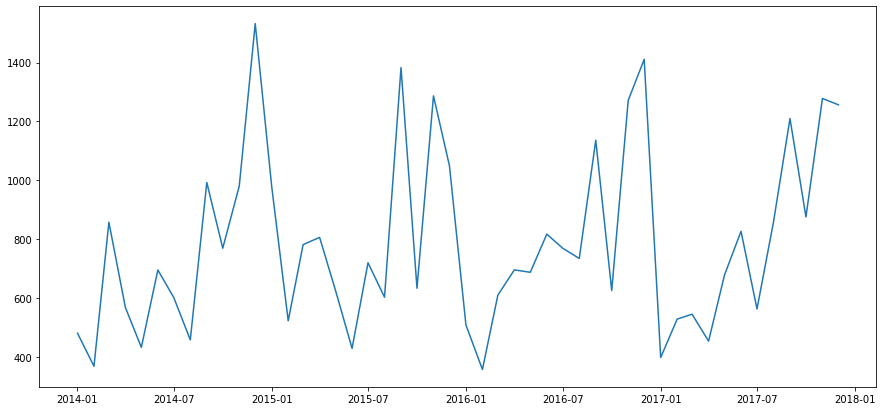

In [19]:
#visualising the data
plt.figure(figsize=(15,7))
plt.plot(store_df1['Sales'])

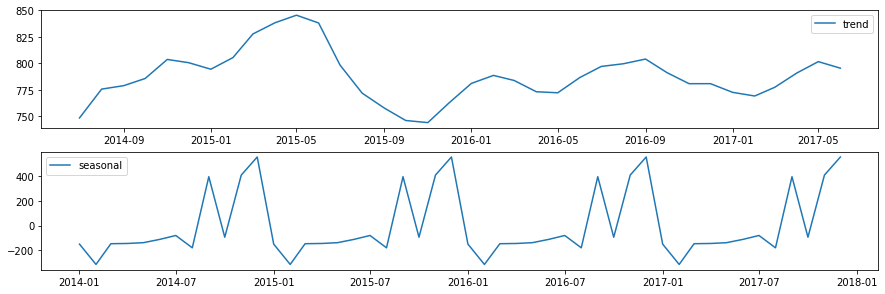

In [20]:
#Decomposing the data using seasonal decompose
data= store_df1['Sales']
decomp= seasonal_decompose(data,freq=12)

d_trend= decomp.trend
d_seasonal= decomp.seasonal


#visualization
fig,ax= plt.subplots(2,1, figsize=(15,10))
plt.subplot(412)
plt.plot(d_trend, label='trend')
plt.legend()

plt.subplot(413)
plt.plot(d_seasonal, label='seasonal')
plt.legend()


In [21]:
#CHECKING THE STATIONARITY OF THE DATA

#DEFINE FUCTION FOR STATIONARITY
def checkStationarity(data):
    pvalue = adfuller(data)[1]
    if pvalue < 0.05:
        ret = "Data is Stationary. Proceed to model building"
    else:
        ret = "Data is not Stationary. Make is stationary"
        
    return(ret)

In [22]:
#checking stationaruty of the data
checkStationarity(data)

'Data is Stationary. Proceed to model building'

In [23]:
# split the data into train and test
rows = int(0.7 * len(store_df1))

store_train = store_df1.Sales[:rows]
store_test = store_df1.Sales[rows:]
print("train = {}, test = {}".format(len(store_train), len(store_test)))

train = 33, test = 15


In [24]:
checkStationarity(store_train)

'Data is Stationary. Proceed to model building'

In [25]:
checkStationarity(store_test)

'Data is not Stationary. Make is stationary'

In [26]:
#MAKING TEST DATA STATIONARY
store_test_diff = store_test - store_test.shift()

#DROPPING NAN VALUES
store_test_diff.dropna(inplace=True)

In [27]:
#FORECASTING USING ACF AND PACF
store_pacf= pacf(store_df1)
store_acf= acf(store_df1)

se= 1.96/np.sqrt(len(store_df1))

Text(0.5, 1.0, 'Partial Auto correlation function')

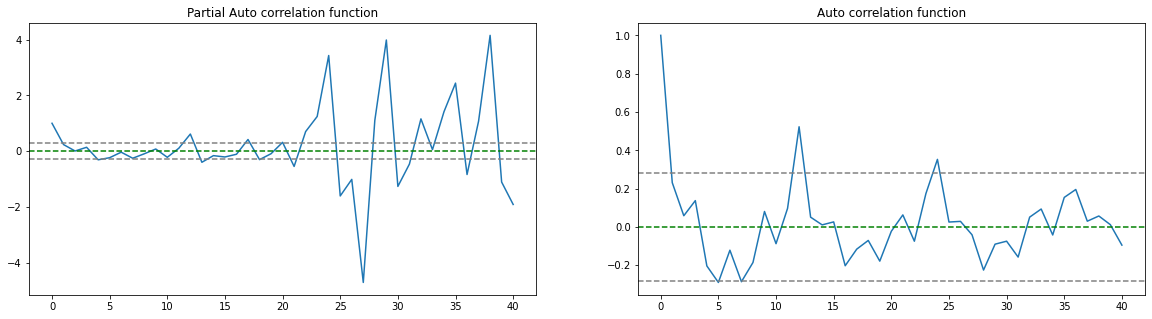

In [28]:
#plot acf and pacf

fig, ax= plt.subplots(figsize=(20,5))

plt.subplot(122)
plt.plot(store_acf)
plt.axhline(y=0, linestyle= '--', color='green')
#assuming the p=97.5% using z-score chart finding z-score
#y= +-1.96
plt.axhline(y=-se, linestyle= '--', color='gray')
plt.axhline(y=se, linestyle= '--', color='gray')
plt.title('Auto correlation function')

plt.subplot(121)
plt.plot(store_pacf)
plt.axhline(y=0, linestyle= '--', color='green')
#assuming the p=97.5% using z-score chart finding z-score
#x= +-1.96
plt.axhline(y=-se, linestyle= '--', color='gray')
plt.axhline(y=se, linestyle= '--', color='gray')
plt.title('Partial Auto correlation function')

In [29]:
P = np.arange(8)
Q = np.arange(2)
print('Values of p: {}\nValues of q: {}'.format(P,Q))

Values of p: [0 1 2 3 4 5 6 7]
Values of q: [0 1]


### BUILDING THE ARMA MODEL

Model :AIC=470.14,BIC=473.13
Good model
****************************************

Model :AIC=471.08,BIC=475.57
Good model
****************************************

Model :AIC=471.03,BIC=475.52
Good model
****************************************

Model :AIC=472.93,BIC=478.91
Good model
****************************************

Model :AIC=473.01,BIC=479.0
Good model
****************************************

Model :AIC=474.5,BIC=481.98
Good model
****************************************

Model :AIC=474.94,BIC=482.42
Good model
****************************************

Model :AIC=476.84,BIC=485.82
Good model
****************************************

Model :AIC=475.9,BIC=484.87
Good model
****************************************

Model :AIC=472.47,BIC=482.95
Good model
****************************************

Model :AIC=475.03,BIC=485.5
Good model
****************************************

Model :AIC=473.85,BIC=485.83
Good model
****************************************

Model :AIC=476.88,BI

,Model No.,p,q,MSE,RMSE
0,1,0,0,122470.720784,349.958170
1,2,0,1,130969.309981,361.896822
2,3,1,0,129375.286197,359.687762
3,4,1,1,130690.885342,361.511944
4,5,2,0,127417.539633,356.955935
5,6,2,1,130378.649279,361.079838
6,7,3,0,123063.013847,350.803383
7,8,3,1,120702.815122,347.423107
8,9,4,0,121142.281776,348.054998
9,10,4,1,135581.925954,368.214511


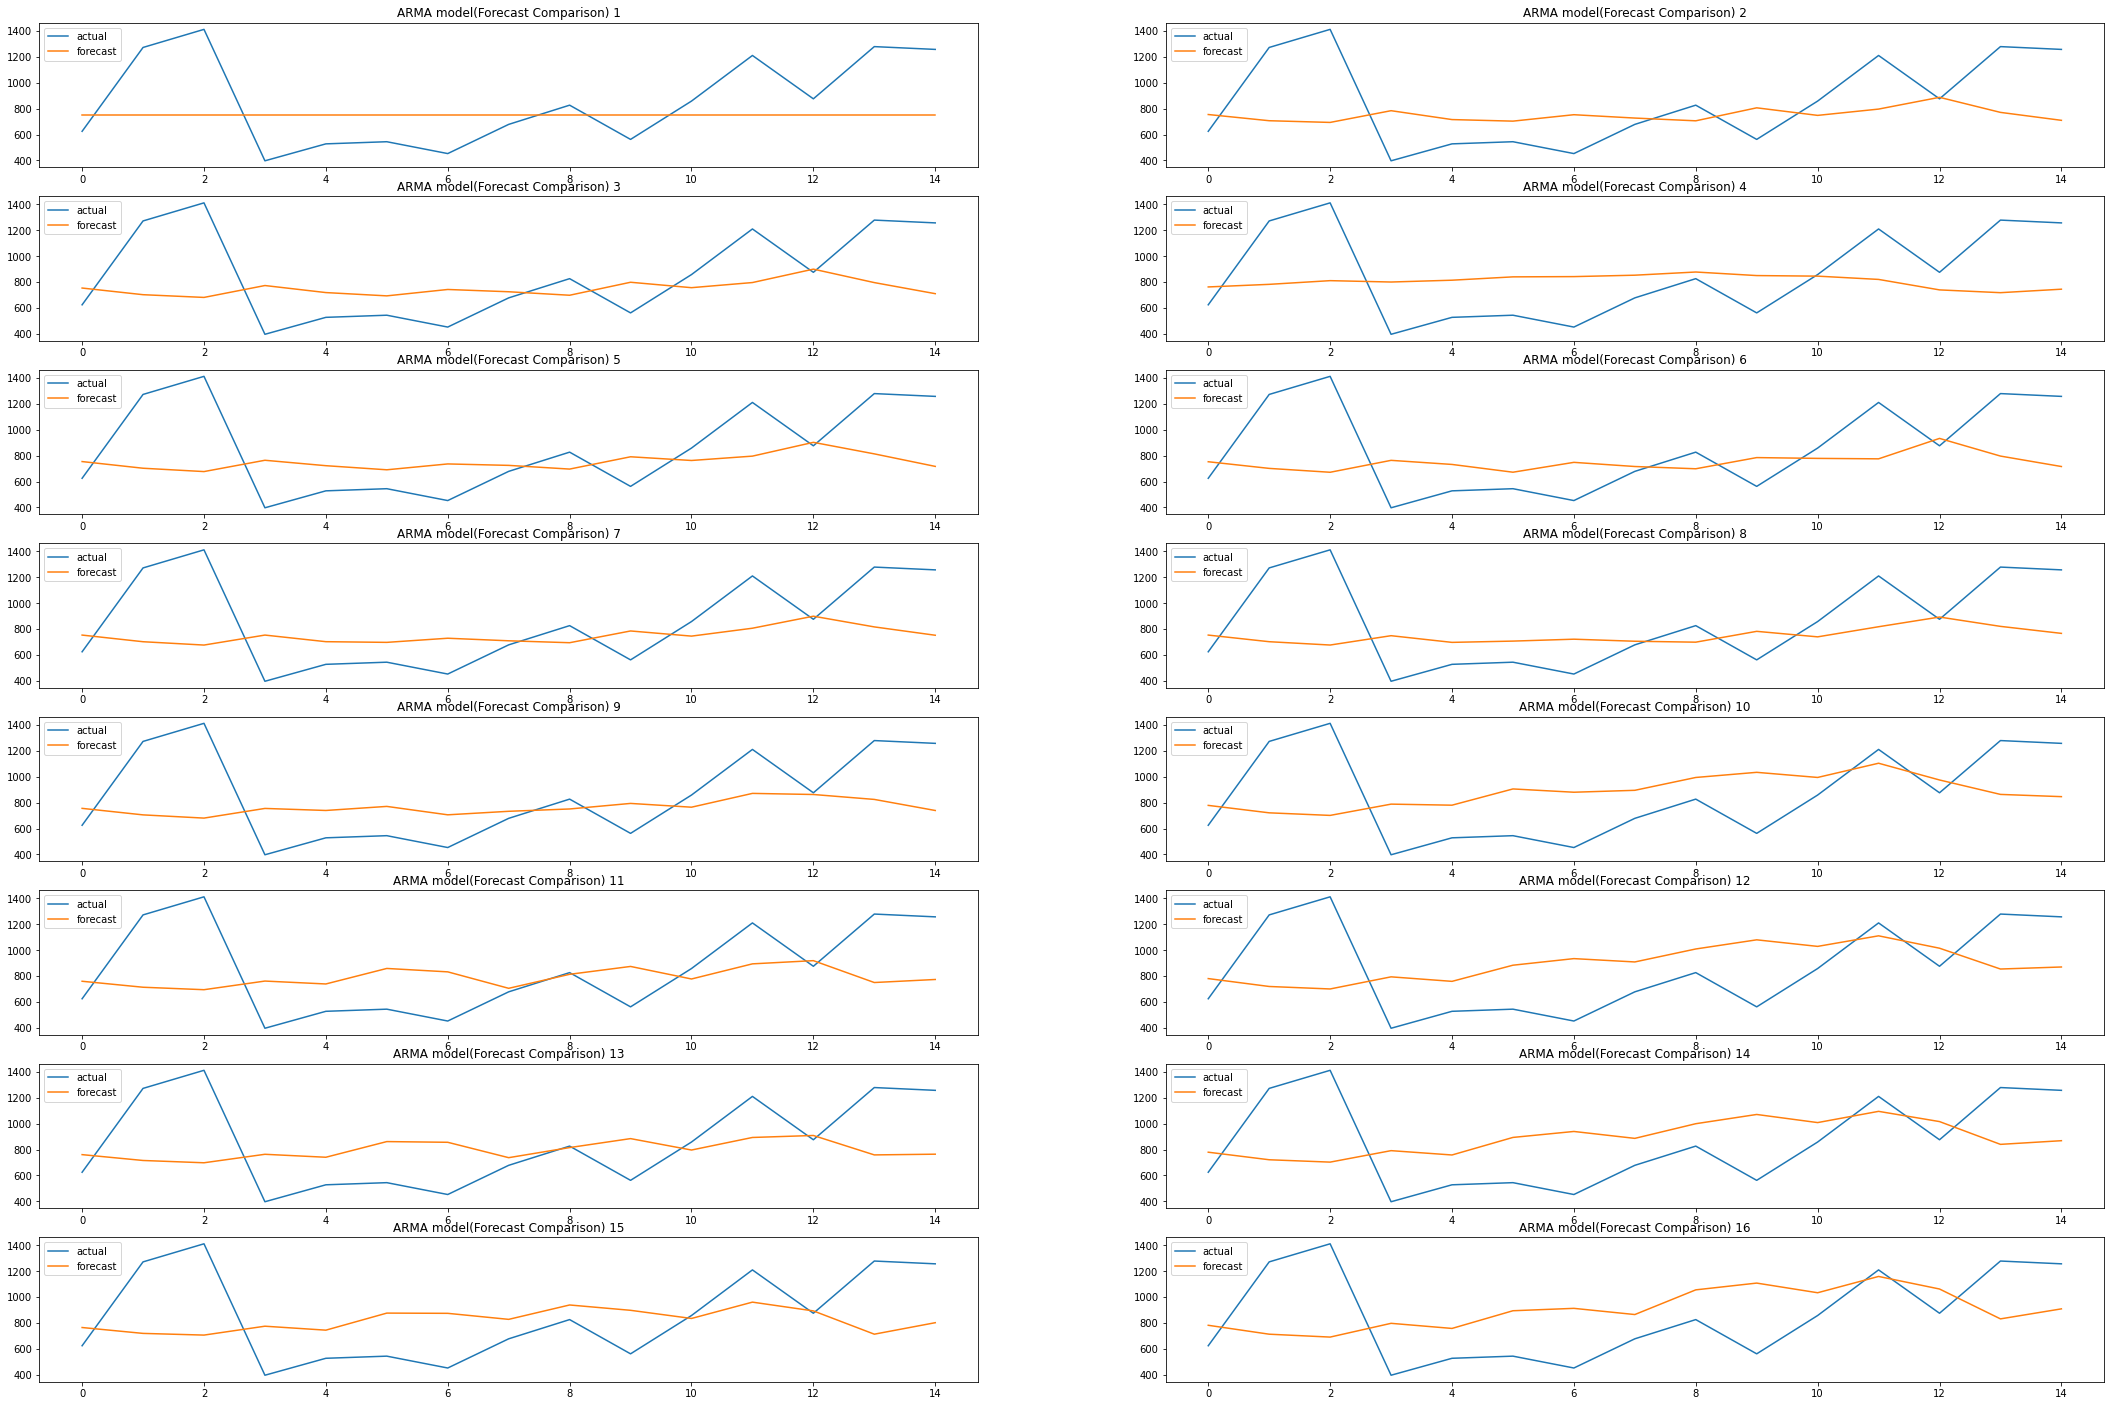

In [30]:
p_l=[0,1,2,3,4,5,6,7]
q_l = [0,1]
d=0
P1 = []
Q1 = []
MSE1=[]
RMSE1 = []
list1 = []
for i in p_l:
  for j in q_l:
    P1.append(i)
    Q1.append(j)

    m1 = ARIMA(store_train,order=(i,0,j)).fit()

    aic1,bic1 = np.round(m1.aic,2),np.round(m1.bic,2)
    print("Model :AIC={},BIC={}".format(aic1,bic1))

    pvalue = sm.stats.acorr_ljungbox(m1.resid,lags=[1])[1]

    if pvalue < 0.05:
      print("Not good model")
    else:
      print("Good model")

    #forecast on the test data 
    f1 = m1.predict(start=0,end=len(store_test)-1)

    #store actual and predicted data in dataframe
    actual = [] ; pred = []

    for k in range(len(f1)):
      actual.append(store_test[k])
      pred.append(f1[k])

    df1 = pd.DataFrame({'actual':actual,'forecast':pred})
    df1['error'] = df1.actual-df1.forecast
    #print(df1)
    list1.append(df1)

    #calculate the MSE
    mse1 = mean_squared_error(df1.actual,df1.forecast)
    
    
    #print("ARMA Model.{}, \np={},q={}\n\tMSE = {}\n\tRMSE ={}".format(m(),i,j,mse1,np.sqrt(mse1)))
    print('*'*40)
    print('')
    MSE1.append(mse1)
    rmse = np.sqrt(mse1)
    RMSE1.append(rmse)

c=1
for i in range(16):
  plt.subplot(8,2,c)
  list1[i].actual.plot(figsize=(37,25),legend=True)
  list1[i].forecast.plot(legend=True)
  plt.title("ARMA model(Forecast Comparison) "+str(c))
  c+=1

MODEL_NO=np.arange(start=1, stop=len(RMSE1)+1)
pd.DataFrame({'Model No.': MODEL_NO, 'p':P1, 'q': Q1,'MSE': MSE1, 'RMSE': RMSE1})

 **INTERPRETATION**-

THE PREDICTION WE'RE GETTING FROM THE SARIMA MODEL FOR P=3 & Q=1 (**RMSE: 347.42**) , IS GETTING GOOD PLOT WITH MINIMUM ERROR VALUES.

### BUILDING THE ARIMA MODEL

Model :AIC=471.16,BIC=474.09,p=0,q=0
Not good model
****************************************
Model :AIC=461.3,BIC=465.7,p=0,q=1
Good model
****************************************
Model :AIC=466.95,BIC=471.34,p=1,q=0
Good model
****************************************
Model :AIC=461.96,BIC=467.82,p=1,q=1
Good model
****************************************
Model :AIC=466.11,BIC=471.97,p=2,q=0
Good model
****************************************
Model :AIC=463.87,BIC=471.2,p=2,q=1
Good model
****************************************
Model :AIC=470.03,BIC=478.83,p=4,q=0
Good model
****************************************
Model :AIC=466.97,BIC=477.23,p=4,q=1
Good model
****************************************
Model :AIC=469.98,BIC=480.24,p=5,q=0
Good model
****************************************
Model :AIC=466.73,BIC=478.46,p=5,q=1
Good model
****************************************
Model :AIC=471.7,BIC=483.43,p=6,q=0
Good model
****************************************
Model :AIC=468.7,BIC=

,Model No.,p,q,MSE,RMSE
0,1,0,0,304002.244082,551.363985
1,2,0,1,109390.161748,330.741835
2,3,1,0,200712.603377,448.009602
3,4,1,1,111265.485477,333.564815
4,5,2,0,156152.813927,395.161757
5,6,2,1,110454.274470,332.346618
6,7,4,0,152553.987341,390.581601
7,8,4,1,104027.939017,322.533625
8,9,5,0,131589.546957,362.752735
9,10,5,1,101770.400616,319.014734


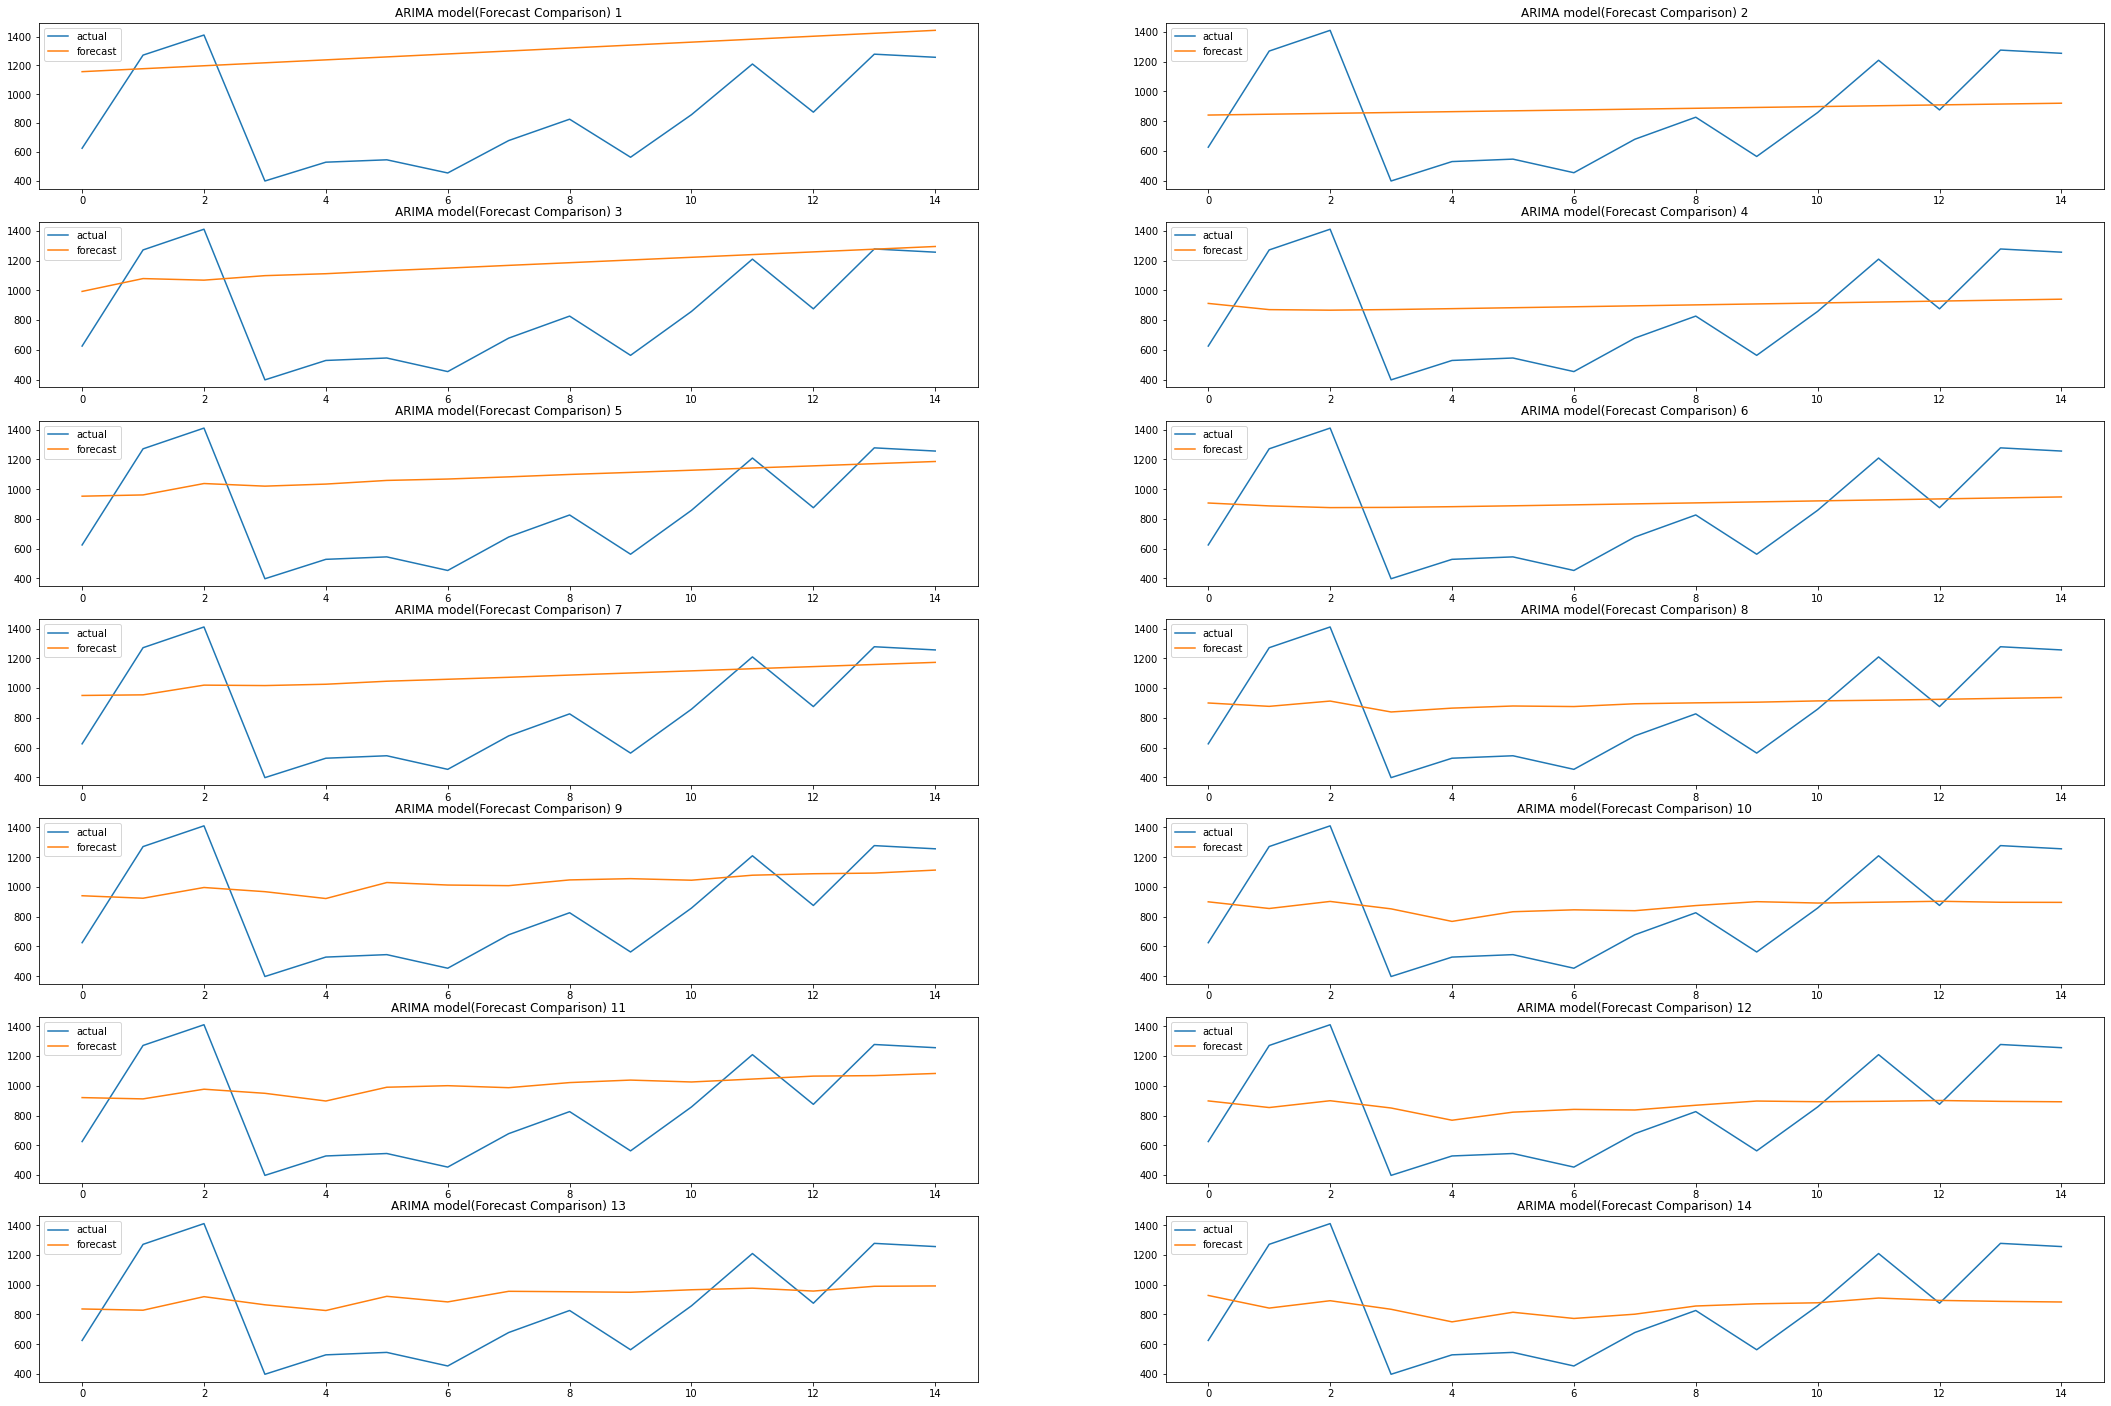

In [31]:
p_l=[0,1,2,4,5,6,7]
q_l = [0,1]
d=1
P2 = []
Q2 = []
MSE2=[]
RMSE2 = []
list2 = []
for i in p_l:
  for j in q_l:
    P2.append(i)
    Q2.append(j)

    m2 = ARIMA(store_train,order=(i,d,j)).fit()

    aic2,bic2 = np.round(m2.aic,2),np.round(m2.bic,2)
    print("Model :AIC={},BIC={},p={},q={}".format(aic2,bic2,i,j))

    pvalue = sm.stats.acorr_ljungbox(m2.resid,lags=[1])[1]

    if pvalue < 0.05:
      print("Not good model")
    else:
      print("Good model")

    #forecast on the test data 
    start = len(store_train); end=len(store_train)+len(store_test)-1
    #print("start={},end={}".format(start,end))
    f2 = m2.predict(start,end, typ ="levels")

    #store actual and predicted data in dataframe
    actual = [] ; pred = []

    for k in range(len(f2)):
      actual.append(store_test[k])
      pred.append(f2[k])

    df2 = pd.DataFrame({'actual':actual,'forecast':pred})
    df2['error'] = df2.actual-df2.forecast
    #print(df1)
    list2.append(df2)

    #calculate the MSE
    mse2 = mean_squared_error(df2.actual,df2.forecast)
    
    
    #print("ARMA Model.{}, \np={},q={}\n\tMSE = {}\n\tRMSE ={}".format(m(),i,j,mse2,np.sqrt(mse2)))
    print('*'*40)
    MSE2.append(mse2)
    rmse = np.sqrt(mse2)
    RMSE2.append(rmse)
c=1
for i in range(14):
  plt.subplot(7,2,c)
  list2[i].actual.plot(figsize=(37,25),legend=True)
  list2[i].forecast.plot(legend=True)
  plt.title("ARIMA model(Forecast Comparison) "+str(c))
  c+=1

MODEL_NO=np.arange(start=1, stop=len(RMSE2)+1)
pd.DataFrame({'Model No.': MODEL_NO, 'p':P2, 'q': Q2,'MSE': MSE2, 'RMSE': RMSE2})

 **INTERPRETATION**-

THE PREDICTION WE'RE GETTING FROM THE ARIMA MODEL FOR P=7 & Q=1 (**RMSE: 311.17**) , IS GETTING GOOD PLOT WITH MINIMUM ERROR VALUES.

### BUILDING THE SARIMA MODEL

,Model No.,p,q,MSE,RMSE
0,1,0,0,838128.292311,915.493469
1,2,0,1,651586.480437,807.209069
2,3,1,0,292054.710637,540.420864
3,4,1,1,118632.579019,344.430804
4,5,2,0,157511.149190,396.876743
5,6,2,1,111535.685251,333.969587
6,7,3,0,98342.505610,313.596087
7,8,3,1,54632.476310,233.735911
8,9,4,0,55151.127128,234.842771
9,10,4,1,72264.108324,268.819844


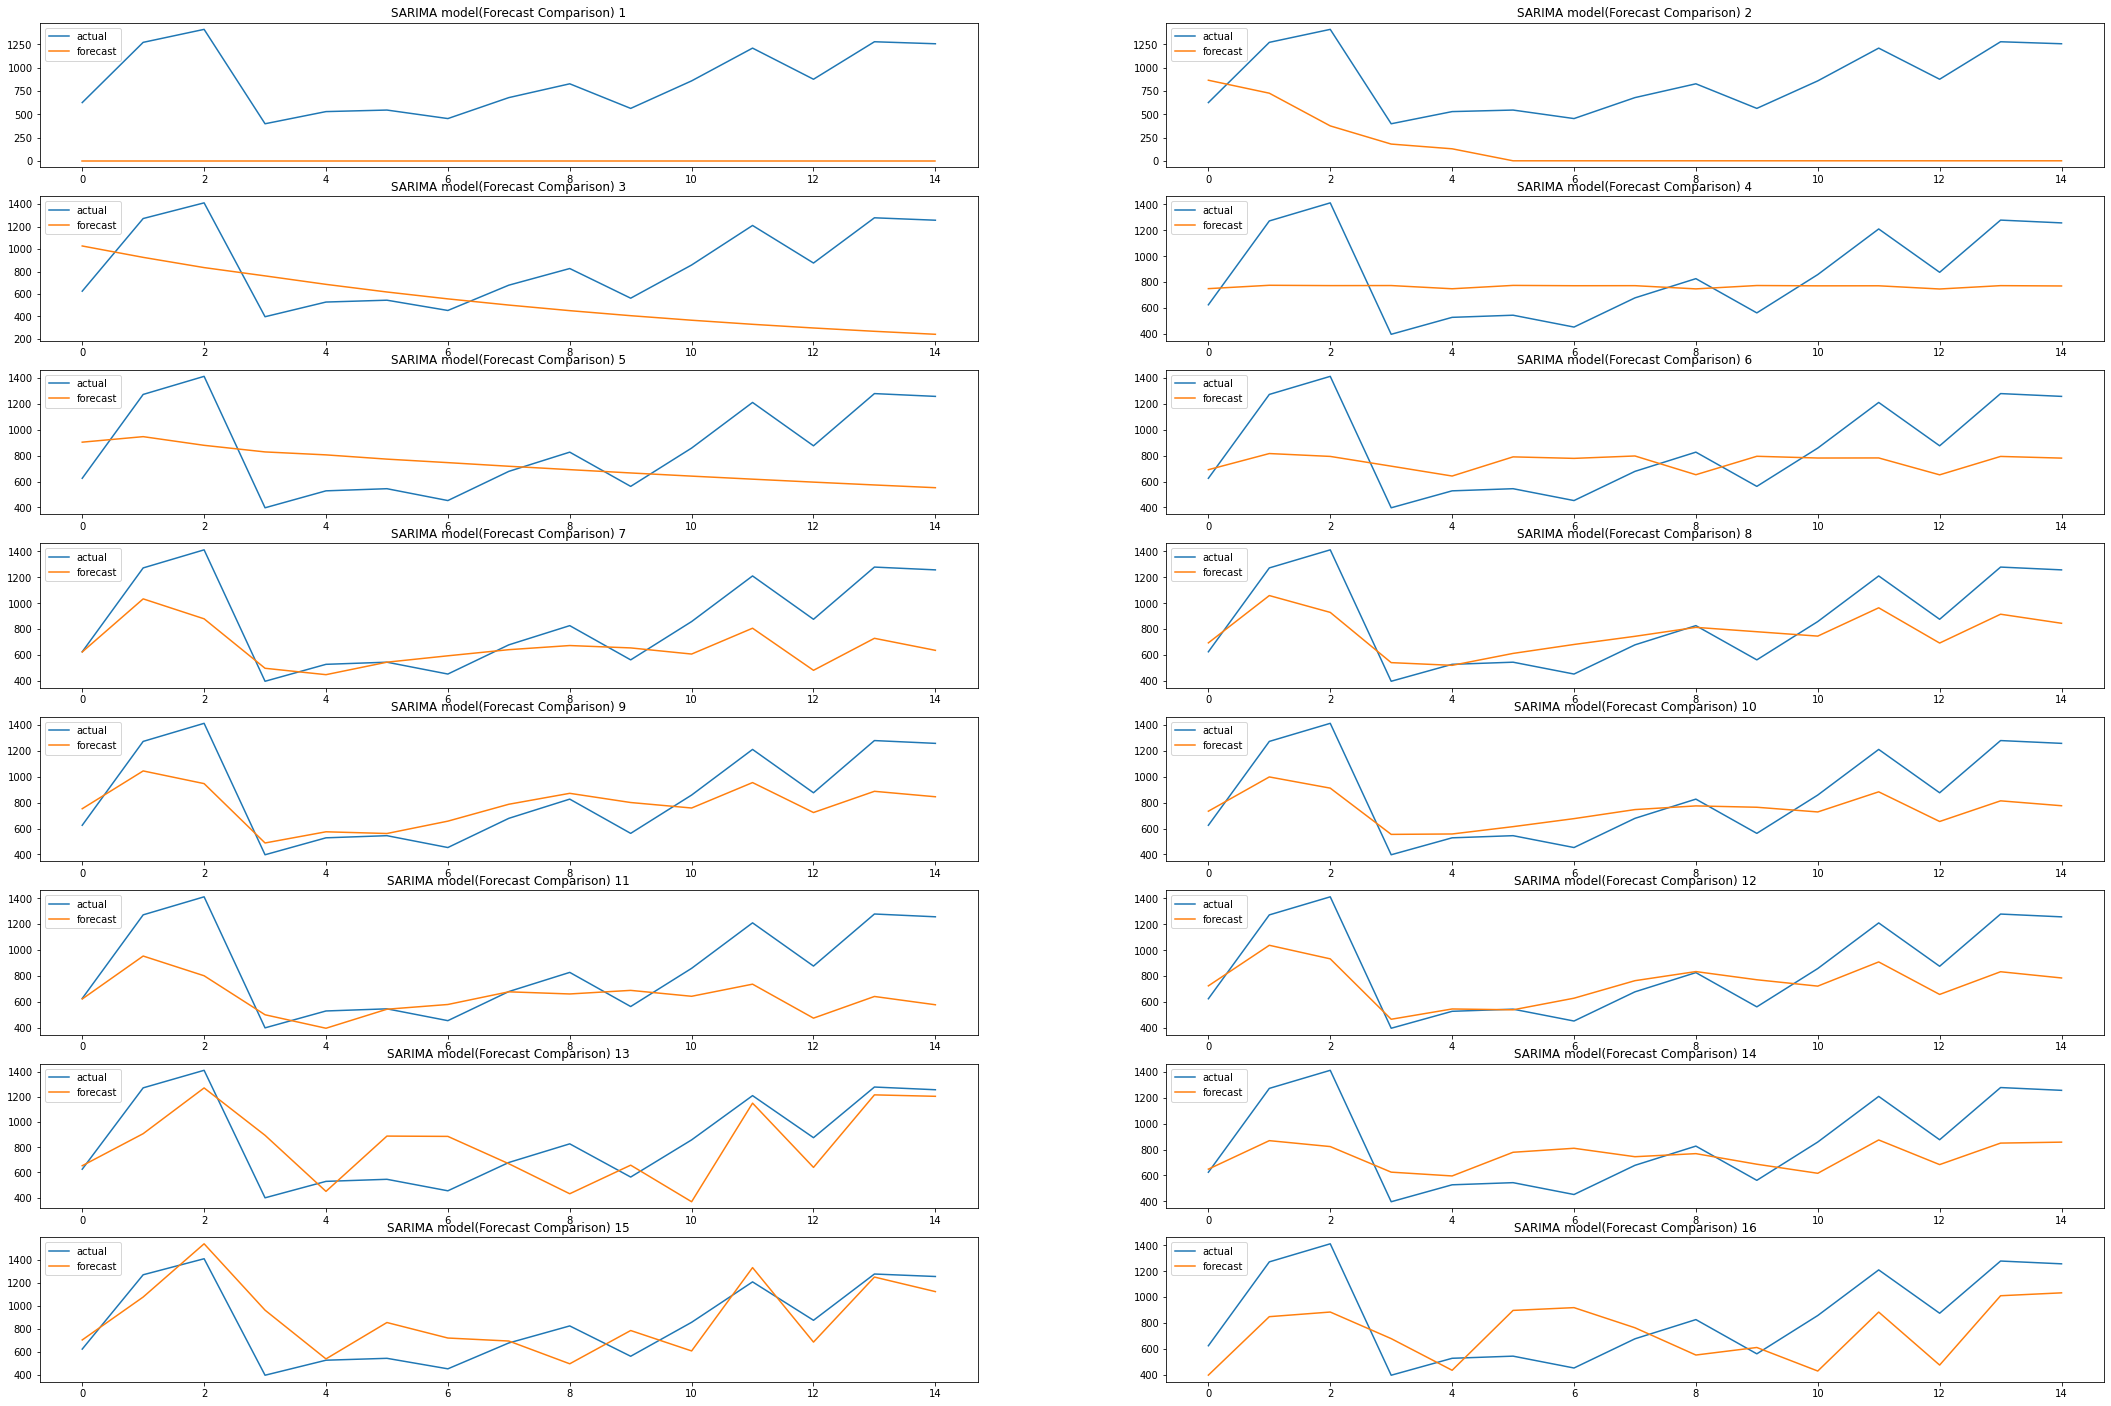

In [32]:
q_l=[0,1,2,3,4,5,6,7]
p_l = [0,1]
d=0
P3 = []
Q3 = []
MSE3=[]
RMSE3 = []
list3 = []
MODEL_NO=np.arange(start=1, stop=len(RMSE3)+1)
for i in q_l:
  for j in p_l:
    P3.append(i)
    Q3.append(j)

    m3 = SARIMAX(store_train, order=(i,d,j),seasonal_order=(i,d,j,4)).fit()

    f3 = m3.forecast(len(store_test))

    #store actual and predicted data in dataframe
    actual = [] ; pred = []

    for k in range(len(f3)):
      actual.append(store_test[k])
      pred.append(f3[k])

    df3 = pd.DataFrame({'actual':actual,'forecast':pred})
    df3['error'] = df3.actual-df3.forecast
    #print(df1)
    list3.append(df3)

    mse3 = mean_squared_error(store_test, f3)
    #print("SARIMAX Model 1. p={},q={} \n\tMSE = {} \n\tRMSE = {}".format(i,j,mse3, np.sqrt(mse3)))

    # plot the actual and forecast data (SARIMAX)
    #plt.figure(figsize=(15,4))
    #plt.plot(store_test,'grey',label='Actual')
    #plt.plot(f3,'red',label='Forecast')
    #plt.legend()
    #plt.title("SARIMA model. Forecast Comparison.p={},q={}".format(i,j))

    MSE3.append(mse3)
    rmse = np.sqrt(mse3)
    RMSE3.append(rmse)

c=1
for i in range(16):
  plt.subplot(8,2,c)
  list3[i].actual.plot(figsize=(37,25),legend=True)
  list3[i].forecast.plot(legend=True)
  plt.title("SARIMA model(Forecast Comparison) "+str(c))
  c+=1


MODEL_NO=np.arange(start=1, stop=len(RMSE3)+1)
pd.DataFrame({'Model No.': MODEL_NO, 'p':P3, 'q': Q3, 'MSE': MSE3, 'RMSE': RMSE3})


 **INTERPRETATION**-

THE PREDICTION WE'RE GETTING FROM THE SARIMA MODEL FOR P=3 & Q=1 **(RMSE: 233.73)** , IS GETTING GOOD PLOT WITH MINIMUM ERROR VALUES.

### SARIMAX MODEL

In [41]:
store_df_srx = store_df_new2.groupby('Order Date')['Sales','Profit','Discount','Quantity'].sum().reset_index()
store_df_srx

,Order Date,Sales,Profit,Discount,Quantity
0,2014-01-06,2573.8200,746.4078,0.00,9
1,2014-01-07,76.7280,-53.7096,0.60,3
2,2014-01-10,51.9400,21.2954,0.00,1
3,2014-01-11,9.9400,3.0814,0.00,2
4,2014-01-13,879.9390,91.2798,0.15,9
...,...,...,...,...,...
884,2017-12-24,1393.4940,222.9092,0.50,14
885,2017-12-25,832.4540,-7.0763,0.80,14
886,2017-12-28,551.2568,-49.6680,2.02,17
887,2017-12-29,2330.7180,492.6236,0.20,26


In [42]:
store_df_srx = store_df_srx.set_index('Order Date')
store_df_srx

,Sales,Profit,Discount,Quantity
Order Date,,,,
2014-01-06,2573.8200,746.4078,0.00,9
2014-01-07,76.7280,-53.7096,0.60,3
2014-01-10,51.9400,21.2954,0.00,1
2014-01-11,9.9400,3.0814,0.00,2
2014-01-13,879.9390,91.2798,0.15,9
...,...,...,...,...
2017-12-24,1393.4940,222.9092,0.50,14
2017-12-25,832.4540,-7.0763,0.80,14
2017-12-28,551.2568,-49.6680,2.02,17


In [43]:
#converting data into daily data
store_df_re= store_df_srx.resample('MS').mean()
store_df_re.shape

(48, 4)

In [44]:
store_df_re = store_df_re.sort_values(by=['Order Date'])

In [45]:
# split the data into train and test
rows = int(0.7 * len(store_df_re))

store_train2 = store_df_re.iloc[:rows]
store_test2 = store_df_re.iloc[rows:]
print("train = {}, test = {}".format(len(store_train2), len(store_test2)))

train = 33, test = 15


In [46]:
#exog_train = store_train2[['Profit','Discount','Quantity']]
#exog_test = store_test2[['Profit','Discount','Quantity']]

exog_train = store_train2[['Discount','Quantity']]
exog_test = store_test2[['Discount','Quantity']]

print("train = {}, test = {}".format(len(exog_train), len(exog_test)))

train = 33, test = 15


BUILDING SARIMAX MODEL

,Model No.,p,q,MSE,RMSE
0,1,0,0,31861.415396,178.497662
1,2,0,1,31378.325842,177.139284
2,3,1,0,31366.203537,177.105064
3,4,1,1,31820.377486,178.382671
4,5,2,0,31547.789190,177.616973
5,6,2,1,31620.199951,177.820696
6,7,3,0,29494.827980,171.740583
7,8,3,1,29513.414893,171.794688
8,9,4,0,30329.833753,174.154626
9,10,4,1,30004.080987,173.216861


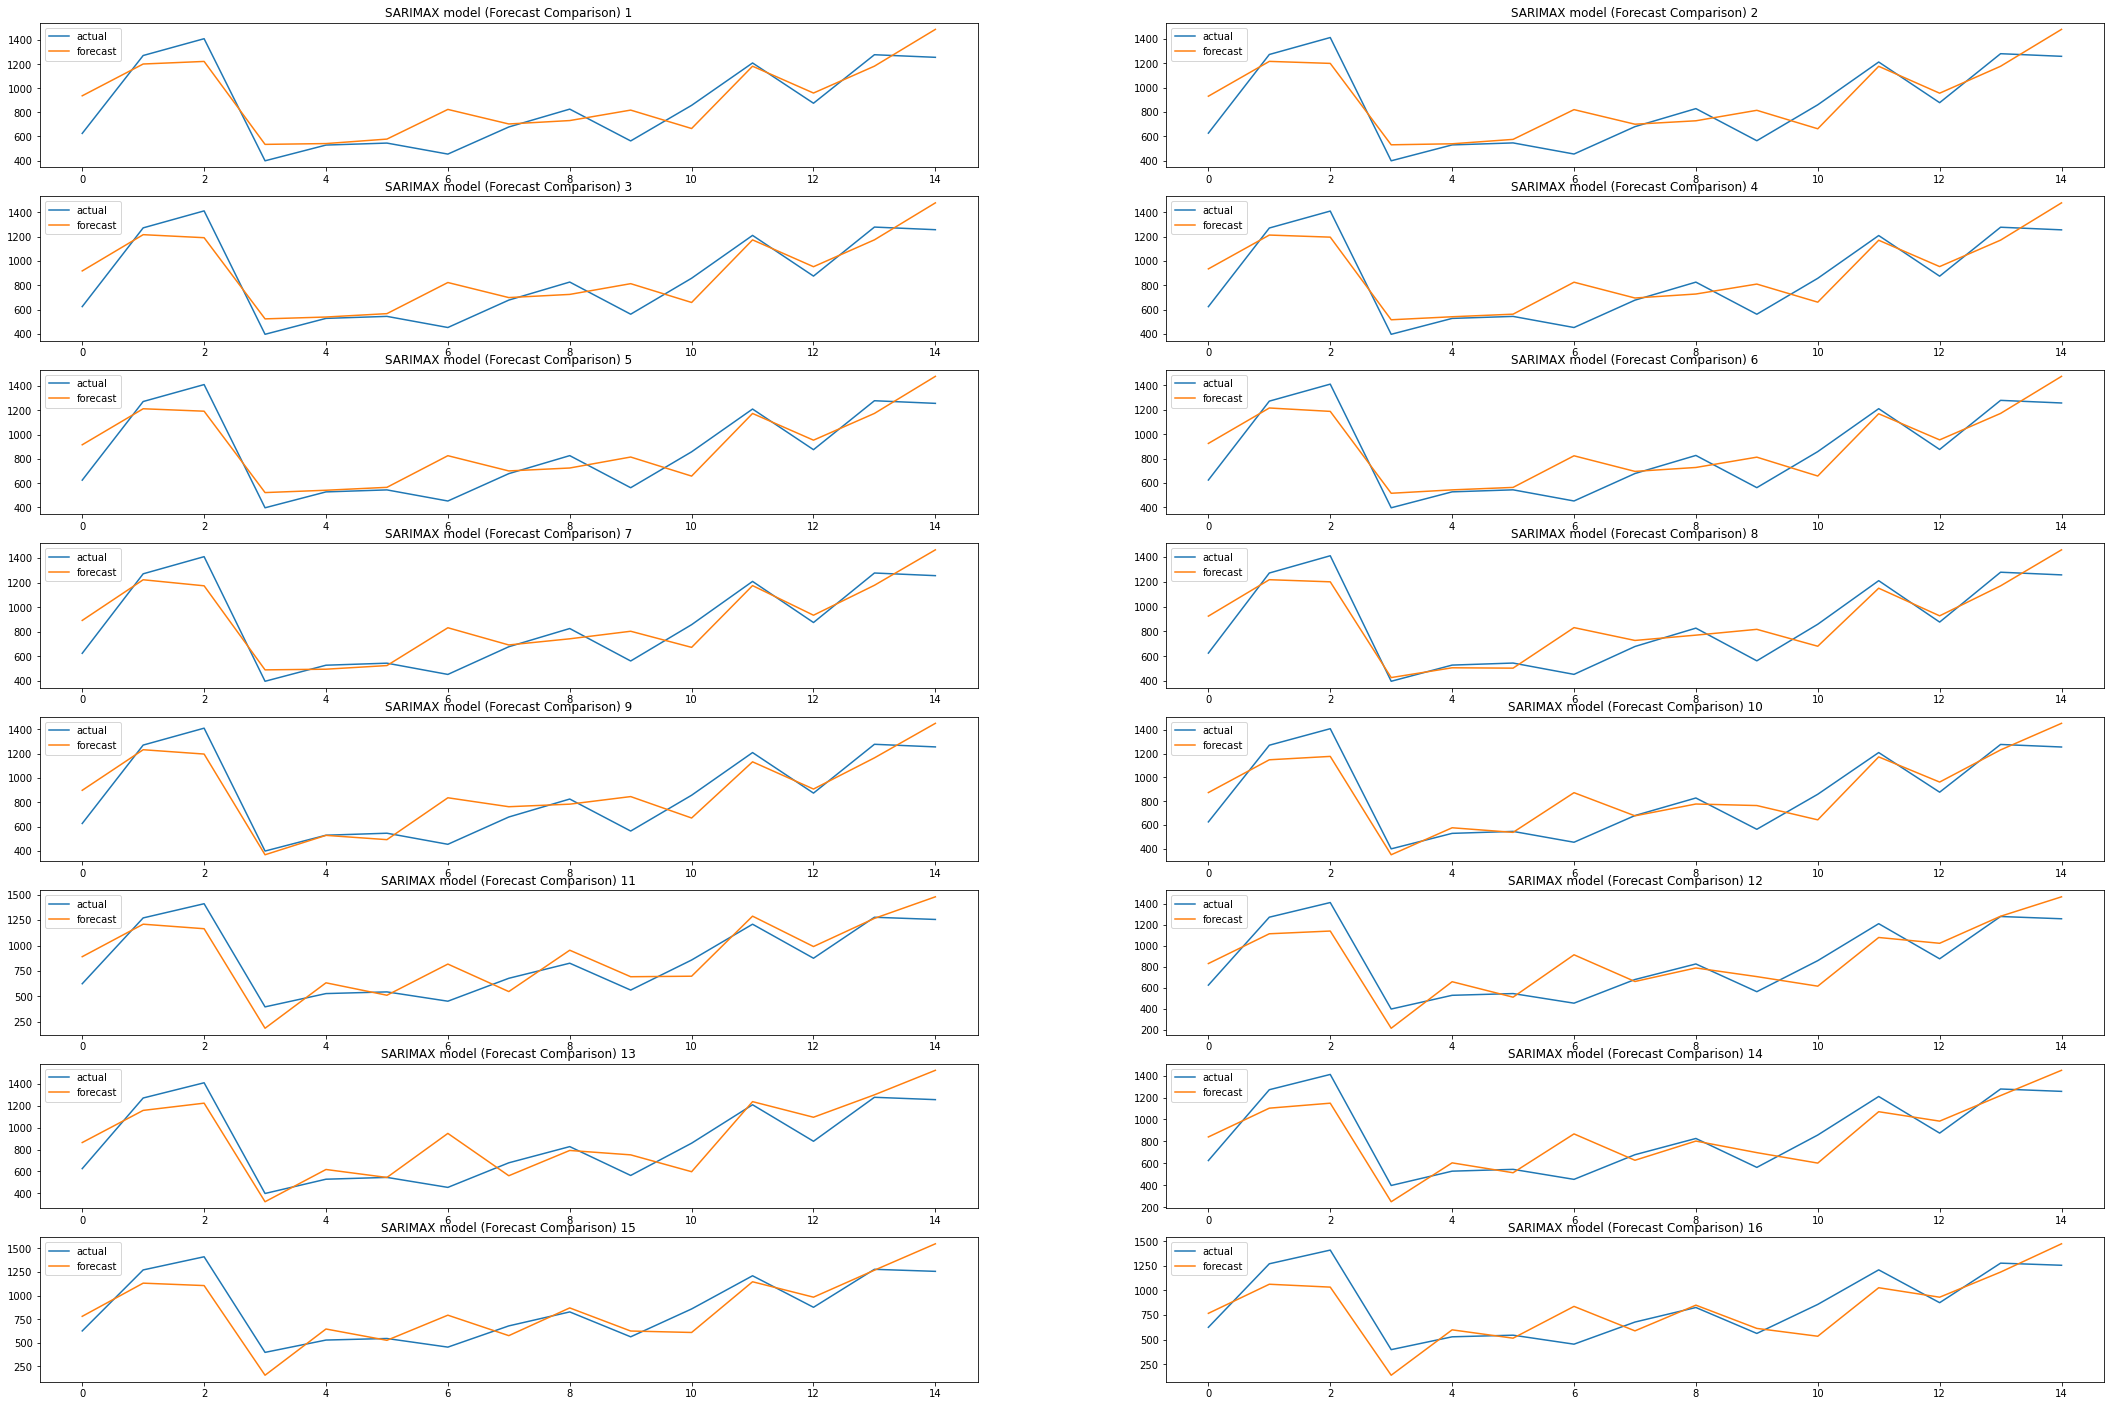

In [47]:
p_l=[0,1,2,3,4,5,6,7]
q_l = [0,1]
d=0
P4 = []
Q4 = []
MSE4=[]
RMSE4 = []
list4 = []
MODEL_NO=np.arange(start=1, stop=len(RMSE4)+1)
for i in p_l:
  for j in q_l:
    P4.append(i)
    Q4.append(j)

    m4 = SARIMAX(store_train2.Sales, order=(i,d,j),seasonal_order=(i,d,j,4), exog=exog_train.values).fit()

    f4 = m4.forecast(len(store_test2), exog=exog_test.values)

    #store actual and predicted data in dataframe
    actual = [] ; pred = []

    for k in range(len(f4)):
      actual.append(store_test[k])
      pred.append(f4[k])

    df4 = pd.DataFrame({'actual':actual,'forecast':pred})
    df4['error'] = df4.actual-df4.forecast
    #print(df1)
    list4.append(df4)

    mse4 = mean_squared_error(store_test2.Sales, f4)
    #print("SARIMAX Model 1. p={},q={} \n\tMSE = {} \n\tRMSE = {}".format(i,j,mse4, np.sqrt(mse4)))

    # plot the actual and forecast data (SARIMAX)
    #plt.figure(figsize=(15,4))
    #plt.plot(store_test2.Sales,'grey',label='Actual')
    #plt.plot(f4,'red',label='Forecast')
    #plt.legend()
    #plt.title("SARIMAX model. Forecast Comparison.p={},q={}".format(i,j))'''


    MSE4.append(mse4)
    rmse = np.sqrt(mse4)
    RMSE4.append(rmse)

c=1
for i in range(16):
  plt.subplot(8,2,c)
  list4[i].actual.plot(figsize=(37,25),legend=True)
  list4[i].forecast.plot(legend=True)
  plt.title("SARIMAX model (Forecast Comparison) "+str(c))
  c+=1

MODEL_NO=np.arange(start=1, stop=len(RMSE4)+1)
pd.DataFrame({'Model No.': MODEL_NO, 'p':P4, 'q': Q4, 'MSE': MSE4, 'RMSE': RMSE4})


 **INTERPRETATION**-

THE PREDICTION WE'RE GETTING FROM THE SARIMAX MODEL FOR P=3 & Q=0 **(RMSE: 171.74)** , IS GETTING GOOD PLOT WITH MINIMUM ERROR VALUES.

In [48]:
print("Dataframe of Actual and Predicted values for SARIMAX model:\n")
df4

Dataframe of Actual and Predicted values for SARIMAX model:



,actual,forecast,error
0,624.872474,767.064572,-142.192098
1,1271.345152,1063.146560,208.198592
2,1410.719808,1033.878065,376.841743
3,397.602133,137.264962,260.337171
4,528.179800,599.159857,-70.980057
5,544.672240,514.236836,30.435404
6,453.297905,837.699510,-384.401605
7,678.302328,588.698025,89.604303
8,826.460291,850.276793,-23.816502
9,562.524857,613.665850,-51.140993


# **CONCLUSION** -
## CONSIDERING GRAPHICAL REPRESENTATION OF ALL THE MODELS I.E. ARMA,SARIMA & SARIMAX , WE CAN SEE THAT THE VISUALIZATIONOF THE SARIMAX IS BEST.  **SARIMAX** IS PREDICTING BEST OUTPUT WITH MINUMUM ERROR.
